In [1]:
from CPD import datasets, loss, models, train
from CPD import new_metrics_2 as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn
import torch

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
HIDDEN_LSTM = 2048 * 8 * 8
HIDDEN_LSTM = 12288
HIDDEN_SIZE = 64

class Combine(nn.Module):
    def __init__(self):
        super(Combine, self).__init__()
        # Pick a pretrained model and load the pretrained weights
        model_name = "slow_r50"
        #self.extractor = torch.hub.load('facebookresearch/pytorchvideo:main', 'slow_r50', pretrained=True)
        self.extractor = torch.hub.load('facebookresearch/pytorchvideo:main', 'x3d_m', pretrained=True)
        # 5 for full cnn part
        self.extractor = nn.Sequential(*list(self.extractor.blocks[:5]))
        #self.fc1 = nn.Linear(HIDDEN_LSTM, HIDDEN_SIZE)
        self.rnn = nn.LSTM(input_size=HIDDEN_LSTM,
                           hidden_size=HIDDEN_SIZE, 
                           num_layers=1,
                           batch_first=True, 
                           dropout=0.5)
        self.fc = nn.Linear(HIDDEN_SIZE, 1)
        #self.fc1 = nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE // 2)
        #self.fc2 = nn.Linear(HIDDEN_SIZE // 2, 1)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()  
        self.activation = nn.Sigmoid()        

    def forward(self, x):

        batch_size, C, timesteps, H, W = x.size()
        c_in = x 
        c_out = self.extractor(c_in) 
        r_in = c_out.transpose(1, 2).flatten(2) # batch_size, timesteps, C*H*W
        r_out = r_in
        r_out, _ = self.rnn(r_out)
        r_out = self.fc(r_out)
        #r_out = self.dropout(self.relu(self.fc1(r_out)))            
        #r_out = self.dropout(self.fc2(r_out))
        out = torch.sigmoid(r_out)
        return out    

In [4]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 2021

In [5]:
cpd_base_model = Combine()

for param in cpd_base_model.extractor.parameters():
    param.requires_grad = False


cpd_model = models.CPD_model(experiments_name='explosion', 
                             loss_type='CPD', T=8, 
                             model=cpd_base_model, 
                             lr=0.001, 
                             batch_size=16, 
                             num_workers=2)

_ = train.train_model(model=cpd_model, max_epochs=None, experiments_name='explosion', patience=10, gpus='0')

Using cache found in /home/eromanenkova/.cache/torch/hub/facebookresearch_pytorchvideo_main
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Equal sampling is impossible, do random sampling.



  | Name  | Type    | Params
----------------------------------
0 | model | Combine | 5.2 M 
1 | loss  | CPDLoss | 0     
----------------------------------
3.2 M     Trainable params
2.0 M     Non-trainable params
5.2 M     Total params
20.675    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: -1.399


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.069 >= min_delta = 0. New best score: -1.468


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0. New best score: -1.479


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.029 >= min_delta = 0. New best score: -1.508


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0. New best score: -1.514


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.174 >= min_delta = 0. New best score: -1.688


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.131 >= min_delta = 0. New best score: -1.820


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.141 >= min_delta = 0. New best score: -1.961


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.262 >= min_delta = 0. New best score: -2.223


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.208 >= min_delta = 0. New best score: -2.431


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.402 >= min_delta = 0. New best score: -2.833


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.628 >= min_delta = 0. New best score: -3.461


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.875 >= min_delta = 0. New best score: -4.337


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.185 >= min_delta = 0. New best score: -12.757


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.284 >= min_delta = 0. New best score: -13.041


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.129 >= min_delta = 0. New best score: -13.170


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.097 >= min_delta = 0. New best score: -13.267


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.462 >= min_delta = 0. New best score: -13.729


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.396 >= min_delta = 0. New best score: -14.125


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.078 >= min_delta = 0. New best score: -14.203
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.025 >= min_delta = 0. New best score: -15.189


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 10 records. Best score: -15.189. Signaling Trainer to stop.


In [6]:
torch.save(cpd_model.state_dict(), 'new_cpd_explosion_2.pth')

In [7]:
bce_base_model = Combine()

for param in bce_base_model.extractor.parameters():
    param.requires_grad = False


bce_model = models.CPD_model(experiments_name='explosion', 
                             loss_type='BCE', T=None, 
                             model=bce_base_model, 
                             lr=0.001, 
                             batch_size=16, 
                             num_workers=2)

_ = train.train_model(model=bce_model, max_epochs=None, experiments_name='explosion', patience=10, gpus='0')

Using cache found in /home/eromanenkova/.cache/torch/hub/facebookresearch_pytorchvideo_main
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

  | Name  | Type    | Params
----------------------------------
0 | model | Combine | 5.2 M 
1 | loss  | BCELoss | 0     
----------------------------------
3.2 M     Trainable params
2.0 M     Non-trainable params
5.2 M     Total params
20.675    Total estimated model params size (MB)


Equal sampling is impossible, do random sampling.


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.330


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.018 >= min_delta = 0. New best score: 0.312


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0. New best score: 0.306


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0. New best score: 0.304


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0. New best score: 0.302


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0. New best score: 0.285


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0. New best score: 0.278


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0. New best score: 0.265


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0. New best score: 0.265


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0. New best score: 0.245


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0. New best score: 0.234


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0. New best score: 0.224


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0. New best score: 0.222


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0. New best score: 0.211
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
torch.save(bce_model.state_dict(), 'new_bce_explosion_2.pth')

In [14]:
threshold_number = 25
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [15]:
_, delay_list_bce, fp_delay_list_bce = metrics.evaluation_pipeline(bce_model, 
                                                                   cpd_model.val_dataloader(), 
                                                                   threshold_list, 
                                                                   device='cuda:0', 
                                                                   verbose=True)

  4%|▎         | 1/27 [00:26<11:31, 26.60s/it]

TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603


  7%|▋         | 2/27 [00:53<11:05, 26.61s/it]

TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603


 11%|█         | 3/27 [01:19<10:39, 26.63s/it]

TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603


 15%|█▍        | 4/27 [01:46<10:12, 26.64s/it]

TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603


 19%|█▊        | 5/27 [02:13<09:45, 26.63s/it]

TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603


 22%|██▏       | 6/27 [02:39<09:19, 26.66s/it]

TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603


 26%|██▌       | 7/27 [03:06<08:53, 26.67s/it]

TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603


 30%|██▉       | 8/27 [03:33<08:27, 26.69s/it]

TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603


 33%|███▎      | 9/27 [03:59<07:59, 26.66s/it]

TN: 168, FP: 137, FN: 1, TP: 9, DELAY:0.03809523954987526, FP_DELAY:11.057143211364746, COVER: 0.905167527302944


 37%|███▋      | 10/27 [04:26<07:33, 26.65s/it]

TN: 183, FP: 122, FN: 1, TP: 9, DELAY:0.03809523954987526, FP_DELAY:11.733333587646484, COVER: 0.9154932548161714


 41%|████      | 11/27 [04:53<07:06, 26.65s/it]

TN: 242, FP: 61, FN: 4, TP: 8, DELAY:0.11746031790971756, FP_DELAY:13.844444274902344, COVER: 0.9538665231373565


 44%|████▍     | 12/27 [05:19<06:39, 26.65s/it]

TN: 251, FP: 51, FN: 4, TP: 9, DELAY:0.12063492089509964, FP_DELAY:14.120635032653809, COVER: 0.9598838391546726


 48%|████▊     | 13/27 [05:46<06:13, 26.66s/it]

TN: 271, FP: 31, FN: 7, TP: 6, DELAY:0.190476194024086, FP_DELAY:14.828571319580078, COVER: 0.9726649238107571


 52%|█████▏    | 14/27 [06:13<05:46, 26.67s/it]

TN: 274, FP: 28, FN: 7, TP: 6, DELAY:0.190476194024086, FP_DELAY:15.073016166687012, COVER: 0.9748474634932968


 56%|█████▌    | 15/27 [06:39<05:20, 26.67s/it]

TN: 283, FP: 19, FN: 8, TP: 5, DELAY:0.2063492089509964, FP_DELAY:15.399999618530273, COVER: 0.9815904388821056


 59%|█████▉    | 16/27 [07:06<04:53, 26.66s/it]

TN: 287, FP: 15, FN: 8, TP: 5, DELAY:0.2063492089509964, FP_DELAY:15.495238304138184, COVER: 0.9847650420567088


 63%|██████▎   | 17/27 [07:33<04:26, 26.65s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 67%|██████▋   | 18/27 [07:59<03:59, 26.65s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 70%|███████   | 19/27 [08:26<03:33, 26.63s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 74%|███████▍  | 20/27 [08:52<03:06, 26.63s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 78%|███████▊  | 21/27 [09:19<02:39, 26.64s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 81%|████████▏ | 22/27 [09:46<02:13, 26.64s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 85%|████████▌ | 23/27 [10:12<01:46, 26.66s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 89%|████████▉ | 24/27 [10:39<01:19, 26.64s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 93%|█████████▎| 25/27 [11:06<00:53, 26.62s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 96%|█████████▋| 26/27 [11:32<00:26, 26.62s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


100%|██████████| 27/27 [11:59<00:00, 26.64s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603
AUC: 0.8157
Time to FA 15.4952, delay detection 0.2063 for best-cover threshold: 0.6971
TN 287, FP 15, FN 8, TP 5 for best-cover threshold: 0.6971
Max COVER 0.9848: for threshold 0.6971
Max F1 0.303: for threshold 0.6971
F1 0.303: for best-cover threshold 0.6971


In [16]:
_, delay_list_cpd, fp_delay_list_cpd = metrics.evaluation_pipeline(cpd_model, 
                                                                   cpd_model.val_dataloader(), 
                                                                   threshold_list, 
                                                                   device='cuda:0', 
                                                                   verbose=True)

  4%|▎         | 1/27 [00:26<11:34, 26.71s/it]

TN: 0, FP: 315, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.9806299603174603


  7%|▋         | 2/27 [00:53<11:08, 26.73s/it]

TN: 239, FP: 70, FN: 2, TP: 4, DELAY:0.03492063656449318, FP_DELAY:13.692063331604004, COVER: 0.9438995718236789


 11%|█         | 3/27 [01:20<10:41, 26.73s/it]

TN: 253, FP: 52, FN: 2, TP: 8, DELAY:0.04126984253525734, FP_DELAY:14.136507987976074, COVER: 0.9534106799285371


 15%|█▍        | 4/27 [01:46<10:14, 26.73s/it]

TN: 268, FP: 37, FN: 4, TP: 6, DELAY:0.10793650895357132, FP_DELAY:14.777777671813965, COVER: 0.9640480413545891


 19%|█▊        | 5/27 [02:13<09:46, 26.66s/it]

TN: 273, FP: 32, FN: 4, TP: 6, DELAY:0.10793650895357132, FP_DELAY:14.952381134033203, COVER: 0.9690083588149065


 22%|██▏       | 6/27 [02:40<09:19, 26.64s/it]

TN: 277, FP: 26, FN: 4, TP: 8, DELAY:0.1111111119389534, FP_DELAY:15.11111068725586, COVER: 0.9736978271948511


 26%|██▌       | 7/27 [03:06<08:52, 26.65s/it]

TN: 282, FP: 21, FN: 6, TP: 6, DELAY:0.13968254625797272, FP_DELAY:15.361905097961426, COVER: 0.9749619207952542


 30%|██▉       | 8/27 [03:33<08:26, 26.64s/it]

TN: 285, FP: 18, FN: 6, TP: 6, DELAY:0.14920635521411896, FP_DELAY:15.469841003417969, COVER: 0.977521444604778


 33%|███▎      | 9/27 [04:00<08:00, 26.67s/it]

TN: 289, FP: 13, FN: 7, TP: 6, DELAY:0.16507937014102936, FP_DELAY:15.615873336791992, COVER: 0.9828492764951097


 37%|███▋      | 10/27 [04:26<07:33, 26.68s/it]

TN: 291, FP: 10, FN: 7, TP: 7, DELAY:0.16507937014102936, FP_DELAY:15.631746292114258, COVER: 0.9840217151675485


 41%|████      | 11/27 [04:53<07:07, 26.69s/it]

TN: 295, FP: 6, FN: 8, TP: 6, DELAY:0.18730159103870392, FP_DELAY:15.688888549804688, COVER: 0.9848752713336046


 44%|████▍     | 12/27 [05:20<06:40, 26.67s/it]

TN: 297, FP: 4, FN: 8, TP: 6, DELAY:0.2063492089509964, FP_DELAY:15.733333587646484, COVER: 0.9846768586351919


 48%|████▊     | 13/27 [05:46<06:13, 26.68s/it]

TN: 299, FP: 2, FN: 8, TP: 6, DELAY:0.2063492089509964, FP_DELAY:15.780952453613281, COVER: 0.98527209673043


 52%|█████▏    | 14/27 [06:13<05:46, 26.66s/it]

TN: 299, FP: 2, FN: 9, TP: 5, DELAY:0.24761904776096344, FP_DELAY:15.828571319580078, COVER: 0.9854291734500068


 56%|█████▌    | 15/27 [06:40<05:20, 26.68s/it]

TN: 300, FP: 0, FN: 9, TP: 6, DELAY:0.24761904776096344, FP_DELAY:15.873015403747559, COVER: 0.986399191086691


 59%|█████▉    | 16/27 [07:06<04:53, 26.68s/it]

TN: 300, FP: 0, FN: 11, TP: 4, DELAY:0.2698412835597992, FP_DELAY:15.917460441589355, COVER: 0.9858878968253968


 63%|██████▎   | 17/27 [07:33<04:26, 26.67s/it]

TN: 300, FP: 0, FN: 11, TP: 4, DELAY:0.2730158865451813, FP_DELAY:15.917460441589355, COVER: 0.9855194160997732


 67%|██████▋   | 18/27 [08:00<03:59, 26.65s/it]

TN: 300, FP: 0, FN: 11, TP: 4, DELAY:0.29206350445747375, FP_DELAY:15.917460441589355, COVER: 0.9833819614027948


 70%|███████   | 19/27 [08:26<03:32, 26.59s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 74%|███████▍  | 20/27 [08:53<03:06, 26.61s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 78%|███████▊  | 21/27 [09:19<02:39, 26.65s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 81%|████████▏ | 22/27 [09:46<02:13, 26.66s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 85%|████████▌ | 23/27 [10:13<01:46, 26.64s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 89%|████████▉ | 24/27 [10:39<01:19, 26.65s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 93%|█████████▎| 25/27 [11:06<00:53, 26.64s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


 96%|█████████▋| 26/27 [11:33<00:26, 26.64s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603


100%|██████████| 27/27 [11:59<00:00, 26.66s/it]

TN: 300, FP: 0, FN: 15, TP: 0, DELAY:0.3523809611797333, FP_DELAY:16.0, COVER: 0.9806299603174603
AUC: 0.5012
Time to FA 15.873, delay detection 0.2476 for best-cover threshold: 0.6027
TN 300, FP 0, FN 9, TP 6 for best-cover threshold: 0.6027
Max COVER 0.9864: for threshold 0.6027
Max F1 0.5714: for threshold 0.6027
F1 0.5714: for best-cover threshold 0.6027


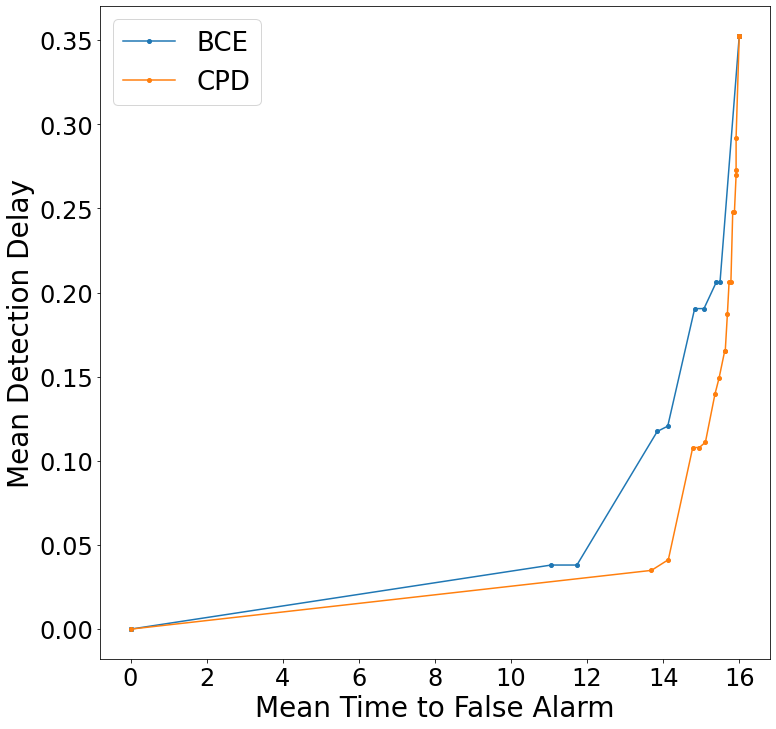

In [18]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list_bce.values(), delay_list_bce.values(), '-o', markersize=4, label='BCE')
plt.plot(fp_delay_list_cpd.values(), delay_list_cpd.values(), '-o', markersize=4, label='CPD')
plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);

99